In [1]:
from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix
from pathlib import Path

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'riu2'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu2,get_pyramid_dataset,lanczos,False,1,True,False


In [3]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for r in range(2, 5):
    db_path = f'../DB/extra_features/radius/{r}'
    for filename in Path(db_path).glob('train_train_*'):   
        file_extension = \
            str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
        properties = file_extension.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        lbp_method = properties[0]
        df_train_temp = pd.read_pickle(filename, compression='gzip')
        df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
        df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
        df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
        df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_train = pd.concat([df_train, df_train_temp], axis=1)
        df_test = pd.concat([df_test, df_test_temp], axis=1)

In [4]:
df_train

,1:1_var_2,1:1_nriuniform_2,1:1_default_2,1:1_riu2_2,1:1_var_3,1:1_nriuniform_3,1:1_default_3,1:1_riu2_3,1:1_var_4,1:1_nriuniform_4,1:1_default_4,1:1_riu2_4
0,46,120,1,8,181,20,1,12,170,240,1,16
1,150,120,1,8,197,20,1,12,48,240,1,16
2,253,120,1,8,93,20,1,12,6,240,1,16
3,62,120,1,8,35,20,1,12,162,240,1,16
4,66,120,1,8,56,252,0,11,131,208,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
226537,214,128,254,8,248,32,254,12,245,0,254,16
226538,218,128,254,8,20,32,254,12,231,0,254,16
226539,255,128,254,8,41,32,254,12,208,0,254,16
226540,9,128,254,8,93,32,254,12,179,0,254,16


In [5]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

def get_convolution_features(seed=0):
    np.random.seed(seed)
    kernel_list = [np.round(np.random.uniform(low=-1, high=1, size=(9,)).reshape(3, 3), 3) for _ in range(5)]
    kernel_list += [np.round(np.random.uniform(low=-1, high=1, size=(25,)).reshape(5, 5), 3) for _ in range(5)]

    paths = []
    for kernel in kernel_list:
        PARAMETERS.CONVOLUTION = kernel
        PARAMETERS.CONV_PATH = PARAMETERS.update_convolution_path(PARAMETERS)
        paths.append(f"../DB/extra_features/convolution/{PARAMETERS.CONV_PATH}")


    for i, path in enumerate(paths):
        train_path = list(Path(path).glob('train_train*'))[0]
        test_path = list(Path(path).glob('train_test*'))[0]
        if i == 0:
            df_train_convolutions = pd.read_pickle(train_path, compression='gzip')
            df_train_convolutions.drop(['label'], axis=1, inplace=True)
            df_train_convolutions.columns = [col + '_' + path.split('/')[-1] for col in df_train_convolutions.columns]
            df_test_convolutions = pd.read_pickle(test_path, compression='gzip')
            df_test_convolutions.drop(['label'], axis=1, inplace=True)
            df_test_convolutions.columns = [col + '_' + path.split('/')[-1] for col in df_test_convolutions.columns]
        else:
            df_temp = pd.read_pickle(train_path, compression='gzip')
            df_temp.drop(['label'], axis=1, inplace=True)
            df_temp.columns = [col + '_' + path.split('/')[-1] for col in df_temp.columns]
            df_train_convolutions = pd.concat([df_train_convolutions, df_temp], axis=1)
            df_temp = pd.read_pickle(test_path, compression='gzip')
            df_temp.drop(['label'], axis=1, inplace=True)
            df_temp.columns = [col + '_' + path.split('/')[-1] for col in df_temp.columns]
            df_test_convolutions = pd.concat([df_test_convolutions, df_temp], axis=1)
    return df_train_convolutions, df_test_convolutions

df_train_convolutions, df_test_convolutions = get_convolution_features(seed=0)
#df_train_convolutions0, df_test_convolutions0 = get_convolution_features(seed=0)
#df_train_convolutions1, df_test_convolutions1 = get_convolution_features(seed=1)
#df_train_convolutions2, df_test_convolutions2 = get_convolution_features(seed=2)

#df_train_convolutions = pd.concat([df_train_convolutions0, df_train_convolutions1, df_train_convolutions2], axis=1)
#df_test_convolutions = pd.concat([df_test_convolutions0, df_test_convolutions1, df_test_convolutions2], axis=1)

In [6]:
df_train_convolutions

,Original_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,1:1_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,1:2_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,1:4_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,1:8_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,2:1_1_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,2:1_2_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,2:1_3_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,2:1_4_0.098;0.43;0.206;0.09;-0.153;0.292;-0.125;0.784;0.927,Original_-0.233;0.583;0.058;0.136;0.851;-0.858;-0.826;-0.96;0.665,...,2:1_4_0.451;0.003;0.912;0.288;-0.152;0.213;-0.962;-0.397;0.32;-0.42;0.236;-0.142;-0.729;-0.403;0.14;0.182;0.149;0.306;0.304;-0.137;0.793;-0.265;-0.128;0.784;0.612,Original_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:1_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:2_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:4_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:8_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_1_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_2_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_3_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_4_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657
0,251,255,255,241,224,225,224,1,1,0,...,255,1,1,31,17,17,239,231,1,1
1,251,239,255,241,224,241,225,17,1,0,...,239,2,1,31,17,17,225,225,1,0
2,252,239,255,241,224,97,1,0,255,0,...,239,3,1,31,17,17,160,241,21,1
3,252,239,255,241,224,1,1,239,239,0,...,225,3,1,31,17,17,225,225,1,1
4,252,238,255,241,224,1,16,238,254,0,...,225,3,1,31,17,17,241,224,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,2,22,30,31,16,16,17,30,30,4,...,1,5,16,16,13,1,255,254,1,0
226538,2,30,30,31,16,1,16,31,30,4,...,0,5,17,16,13,1,255,0,16,22
226539,2,30,30,15,16,22,30,30,30,4,...,16,5,1,255,0,1,16,16,30,30
226540,2,30,30,15,16,30,30,30,30,4,...,17,5,0,255,0,1,16,16,30,30


In [7]:
df_train = pd.concat([df_train, df_train_convolutions], axis=1)
df_test = pd.concat([df_test, df_test_convolutions], axis=1)

In [8]:
df_train

,1:1_var_2,1:1_nriuniform_2,1:1_default_2,1:1_riu2_2,1:1_var_3,1:1_nriuniform_3,1:1_default_3,1:1_riu2_3,1:1_var_4,1:1_nriuniform_4,...,2:1_4_0.451;0.003;0.912;0.288;-0.152;0.213;-0.962;-0.397;0.32;-0.42;0.236;-0.142;-0.729;-0.403;0.14;0.182;0.149;0.306;0.304;-0.137;0.793;-0.265;-0.128;0.784;0.612,Original_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:1_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:2_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:4_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,1:8_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_1_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_2_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_3_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657,2:1_4_0.408;-0.8;0.839;0.428;0.998;-0.701;0.736;-0.675;0.231;-0.752;0.696;0.615;0.138;-0.186;-0.862;0.395;-0.093;0.444;0.733;0.951;0.712;-0.977;-0.28;0.46;-0.657
0,46,120,1,8,181,20,1,12,170,240,...,255,1,1,31,17,17,239,231,1,1
1,150,120,1,8,197,20,1,12,48,240,...,239,2,1,31,17,17,225,225,1,0
2,253,120,1,8,93,20,1,12,6,240,...,239,3,1,31,17,17,160,241,21,1
3,62,120,1,8,35,20,1,12,162,240,...,225,3,1,31,17,17,225,225,1,1
4,66,120,1,8,56,252,0,11,131,208,...,225,3,1,31,17,17,241,224,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,214,128,254,8,248,32,254,12,245,0,...,1,5,16,16,13,1,255,254,1,0
226538,218,128,254,8,20,32,254,12,231,0,...,0,5,17,16,13,1,255,0,16,22
226539,255,128,254,8,41,32,254,12,208,0,...,16,5,1,255,0,1,16,16,30,30
226540,9,128,254,8,93,32,254,12,179,0,...,17,5,0,255,0,1,16,16,30,30


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 4.071884 seconds.
You can set `force_col_wise=true` to remove the overhead.


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.033062 seconds.
You can set `force_col_wise=true` to remove the overhead.


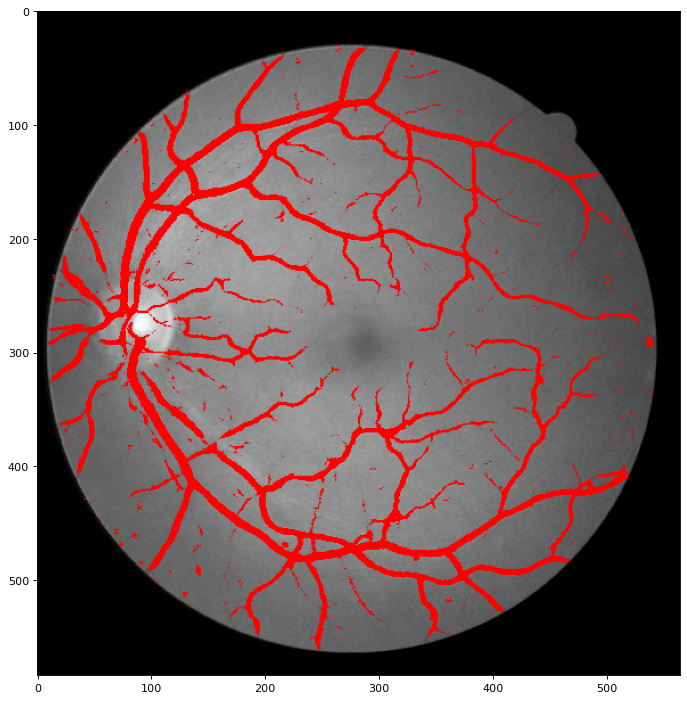

Accuracy score: 0.9410673020686031

F1 score: 0.7705459490965612

Confusion matrix:

     t/p      0     1 
        0 1147555 39990 
        1 40318 134844 
Sensivity: 0.7698245053150797
Specificity: 0.9663254866131389


(0.941, 0.771, 1147555, 39990, 40318, 134844)

In [9]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True, extra_features={'train': df_train, 'test': df_test}, add_channels=True, recurrence=True)

In [15]:
with open(f"../models/lbm_fit_optimal.pkl", 'rb') as f:
    model = pickle.load(f)

In [16]:
feature_imp = pd.DataFrame(sorted(zip(model['clf'].feature_importances_, model['features'])), columns=['Value','Feature'])

In [17]:
feature_imp

,Value,Feature
0,0,1:1_0.341;-0.579;-0.742;-0.369;-0.273;0.14;-0....
1,0,1:1_0.953;-0.063;0.954;0.21;0.479;-0.922;-0.43...
2,0,1:1_riu2_2
3,0,1:2_0.341;-0.579;-0.742;-0.369;-0.273;0.14;-0....
4,0,1:4_0.341;-0.579;-0.742;-0.369;-0.273;0.14;-0....
...,...,...
172,121,recurrence_0
173,135,var_1:4
174,162,recurrence_1
175,168,var_1:8


In [18]:
convolutions = list(set([c.split('_')[-1] for c in feature_imp['Feature'] if ';' in c]))
convolutions = {c: f'conv_{i}' for i, c in enumerate(convolutions)}
feature_imp['Feature'] = [c if ';' not in c else c.replace(c.split('_')[-1], convolutions[c.split('_')[-1]]) for c in feature_imp['Feature']]

feature_imp

,Value,Feature
0,0,1:1_conv_7
1,0,1:1_conv_0
2,0,1:1_riu2_2
3,0,1:2_conv_7
4,0,1:4_conv_7
...,...,...
172,121,recurrence_0
173,135,var_1:4
174,162,recurrence_1
175,168,var_1:8


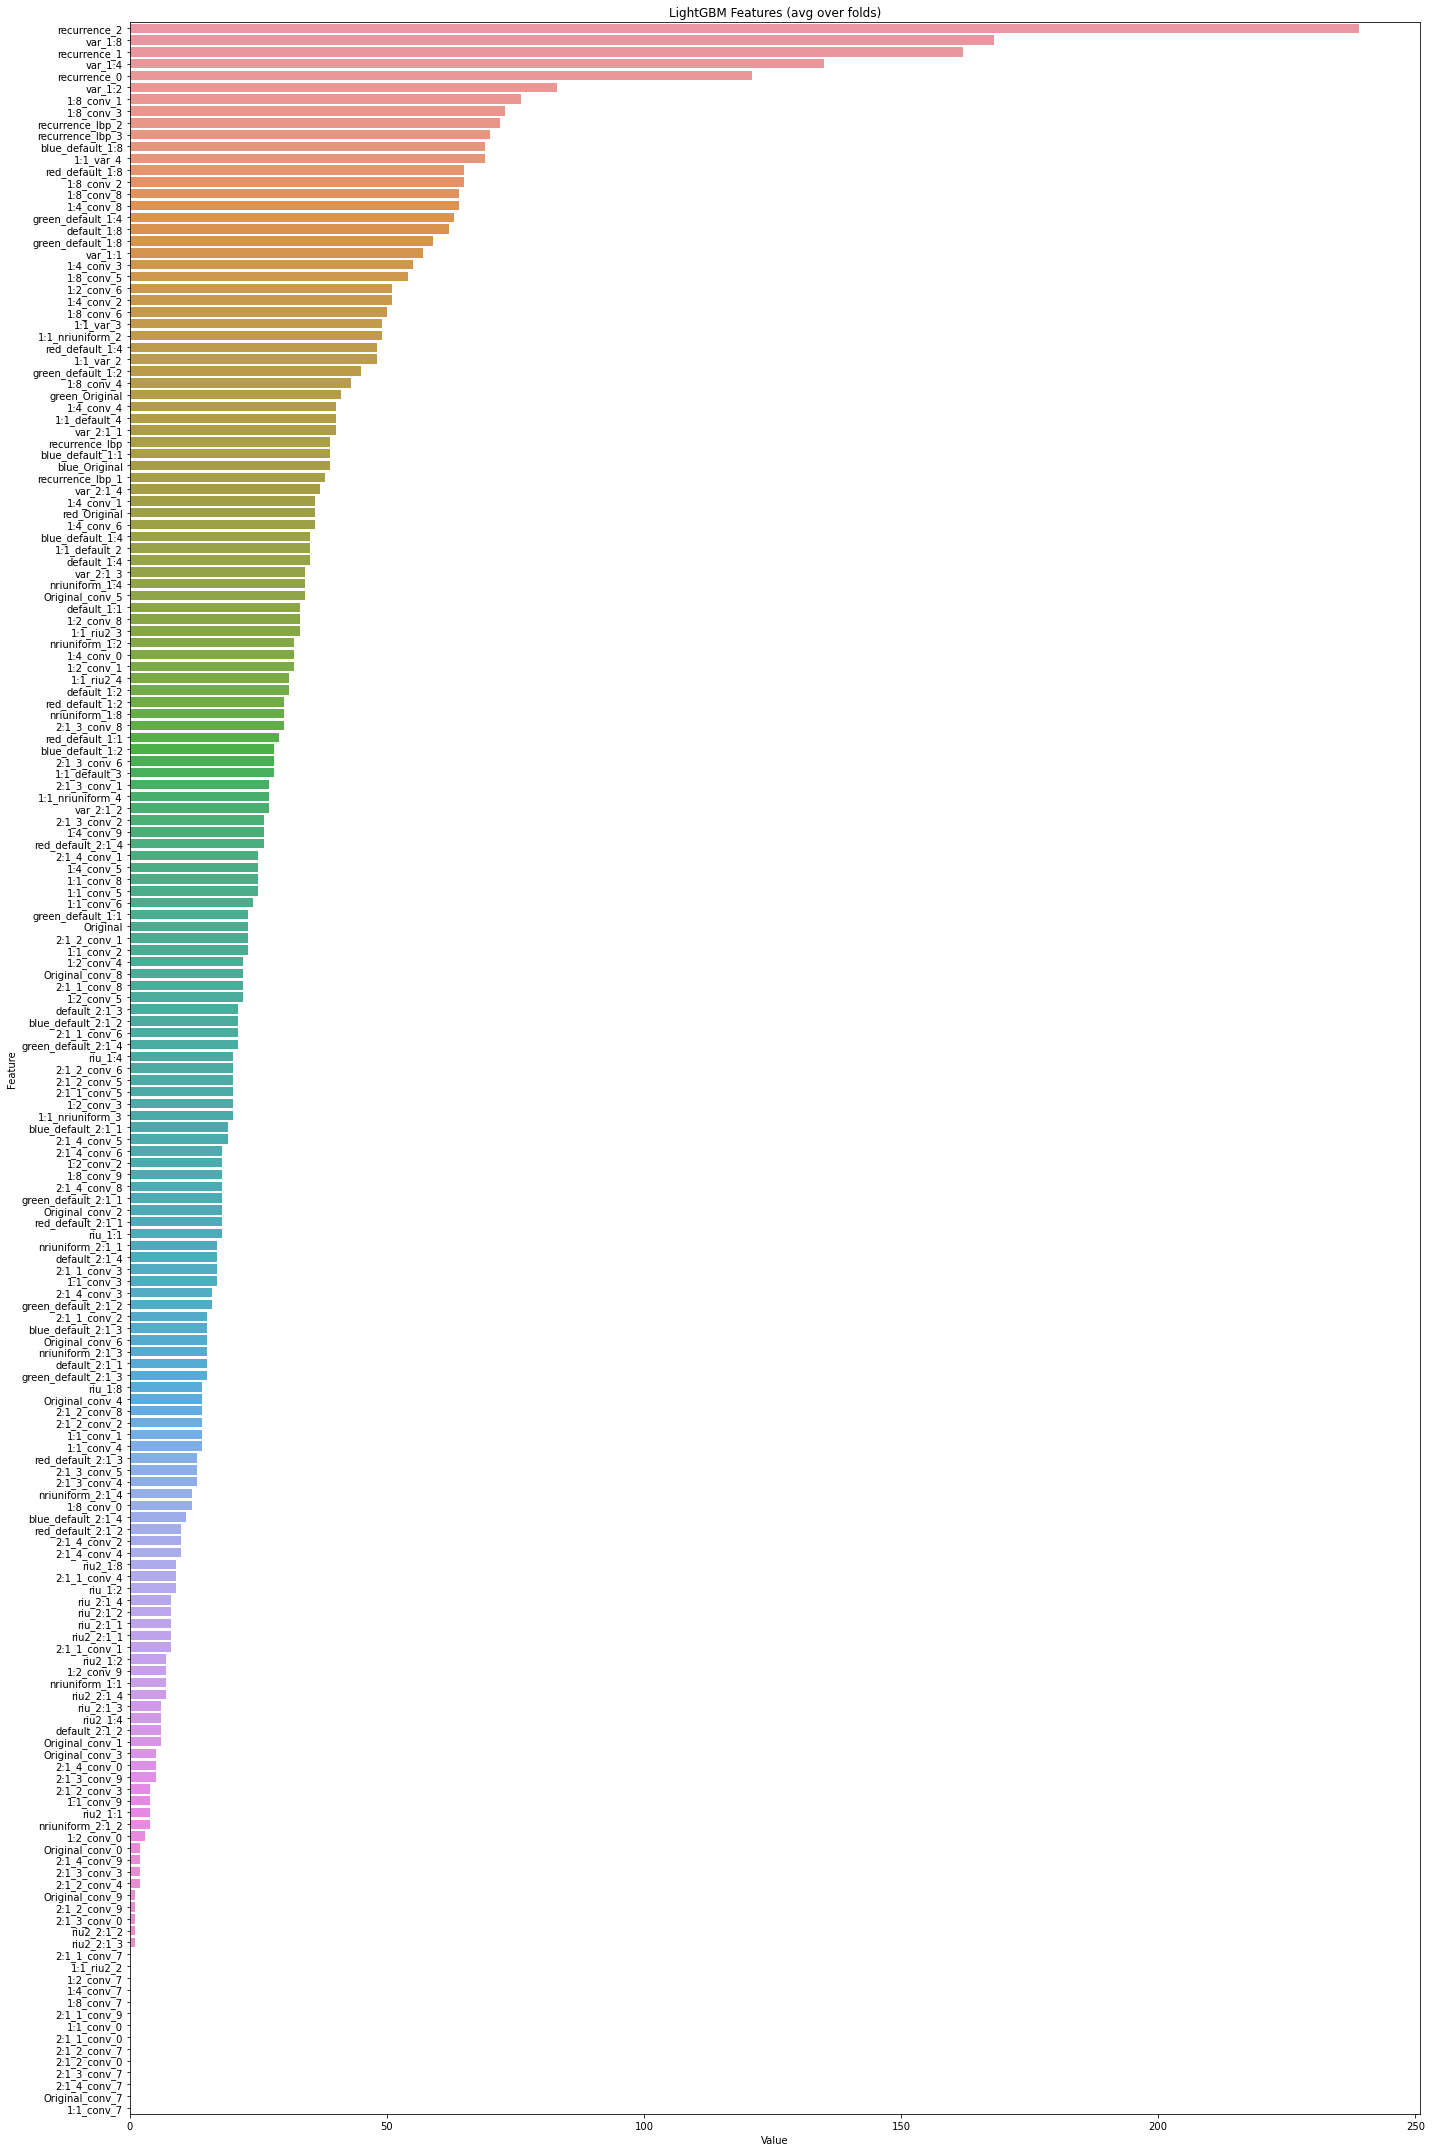

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(20, 30))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [29]:
feature_imp['Feature_type'] = feature_imp['Feature']

for i, c in enumerate(feature_imp['Feature']):
    c_type = c
    if 'recurrence' in c:
        c_type = 'recurrence'
    elif 'conv' in c:
        c_type = 'conv'
    elif 'green' in c or 'blue' in c or 'red' in c:
        c_type = 'rgb'
    elif c.startswith('1:1_') and ('conv' not in c) and (c.endswith('_1') or c.endswith('_2') or c.endswith('_3') or c.endswith('_4')):
        c_type = 'radius'
    else:
        c_type = 'pyramid'
    feature_imp.loc[i, 'Feature_type'] = c_type

set(feature_imp['Feature_type'])

{'conv', 'pyramid', 'radius', 'recurrence', 'rgb'}

In [30]:
feature_imp

,Value,Feature,Feature_type
0,0,1:1_conv_7,conv
1,0,1:1_conv_0,conv
2,0,1:1_riu2_2,radius
3,0,1:2_conv_7,conv
4,0,1:4_conv_7,conv
...,...,...,...
172,121,recurrence_0,recurrence
173,135,var_1:4,pyramid
174,162,recurrence_1,recurrence
175,168,var_1:8,pyramid


In [32]:
feature_imp.groupby("Feature_type")["Value"].sum().to_frame().sort_values(by="Value", ascending=False)

,Value
Feature_type,
conv,1769
pyramid,1109
rgb,852
recurrence,741
radius,429


In [34]:
feature_imp.groupby("Feature_type")["Value"].describe()

,count,mean,std,min,25%,50%,75%,max
Feature_type,,,,,,,,
conv,90.0,19.655556,18.327949,0.0,4.25,17.5,25.75,76.0
pyramid,41.0,27.048780,33.694177,1.0,8.00,17.0,33.00,168.0
radius,12.0,35.750000,17.368336,0.0,27.75,34.0,48.25,69.0
recurrence,7.0,105.857143,73.727943,38.0,54.50,72.0,141.50,239.0
rgb,27.0,31.555556,17.365601,10.0,18.00,28.0,40.00,69.0
